see: https://github.com/facebookresearch/segment-anything/blob/main/notebooks/automatic_mask_generator_example.ipynb

see: https://github.com/facebookresearch/segment-anything/blob/main/notebooks/predictor_example.ipynb -> querying segmentation using keypoint or box for more sophisticated segmentation

In [ ]:
%pip install git+https://github.com/facebookresearch/segment-anything.git
%pip install torch torchvision opencv-python matplotlib
! wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

filename: kodim05.png


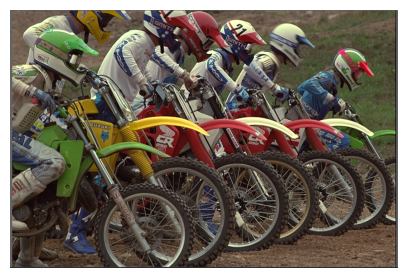

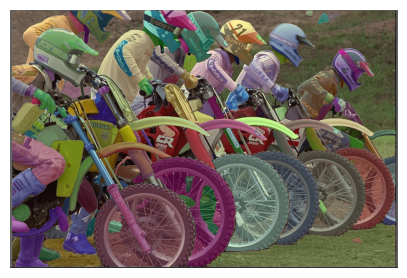

In [12]:
from pathlib import Path
import matplotlib.pyplot as plt
import random
from segment_anything import SamAutomaticMaskGenerator, sam_model_registry, SamPredictor
import numpy as np
import torch
import cv2
import sys
sys.path.append("..")


"""
read in random image
"""

filename =  f'kodim{random.randint(1, 24):02d}.png'
imgpath = Path.cwd().parent / 'data' / 'kodak' / filename
assert imgpath.exists(), f'Image not found at {imgpath}'
image = cv2.imread(str(imgpath))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(f"filename: {filename}")

plt.figure(figsize=(5,5))
plt.imshow(image)
plt.axis('off')
plt.show()

"""
segment
"""

sam_checkpoint = "sam_vit_h_4b8939.pth" # this is the largest model
model_type = "vit_h"
device = "cpu" # "cpu" or "cuda" (not "mps")

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)
masks_generator = SamAutomaticMaskGenerator(model=sam)
# mask_generator_2 = SamAutomaticMaskGenerator( # example for fine-tuning the parameters
#     model=sam,
#     points_per_side=32,
#     pred_iou_thresh=0.86,
#     stability_score_thresh=0.92,
#     crop_n_layers=1,
#     crop_n_points_downscale_factor=2,
#     min_mask_region_area=100,  # Requires open-cv to run post-processing
# )
masks = masks_generator.generate(image)

def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

plt.figure(figsize=(5,5))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show()
